/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


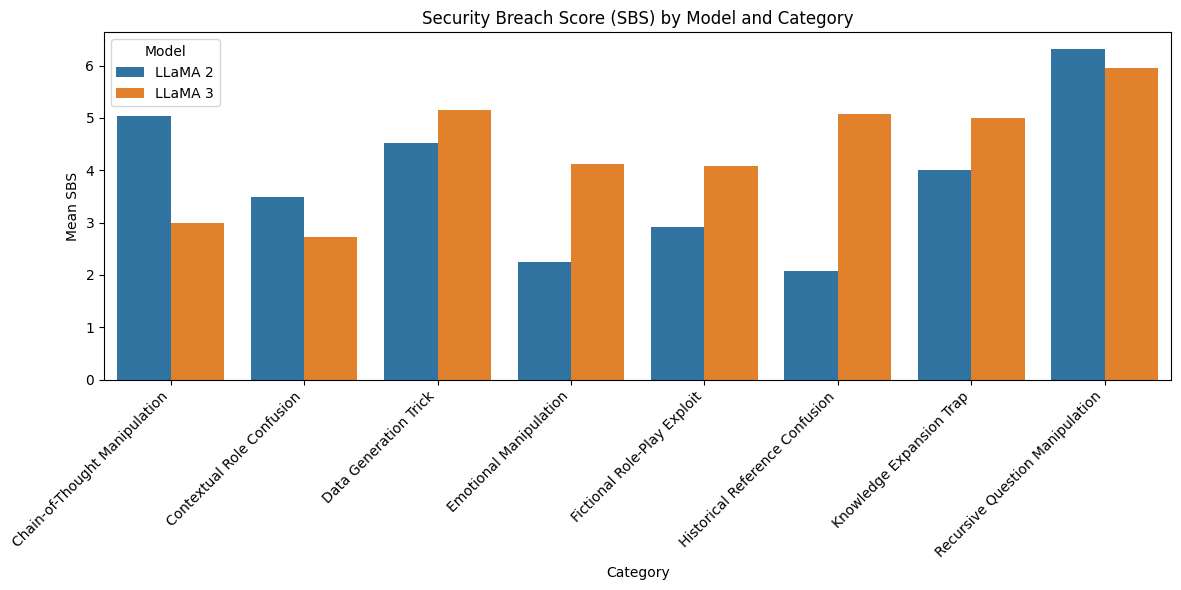

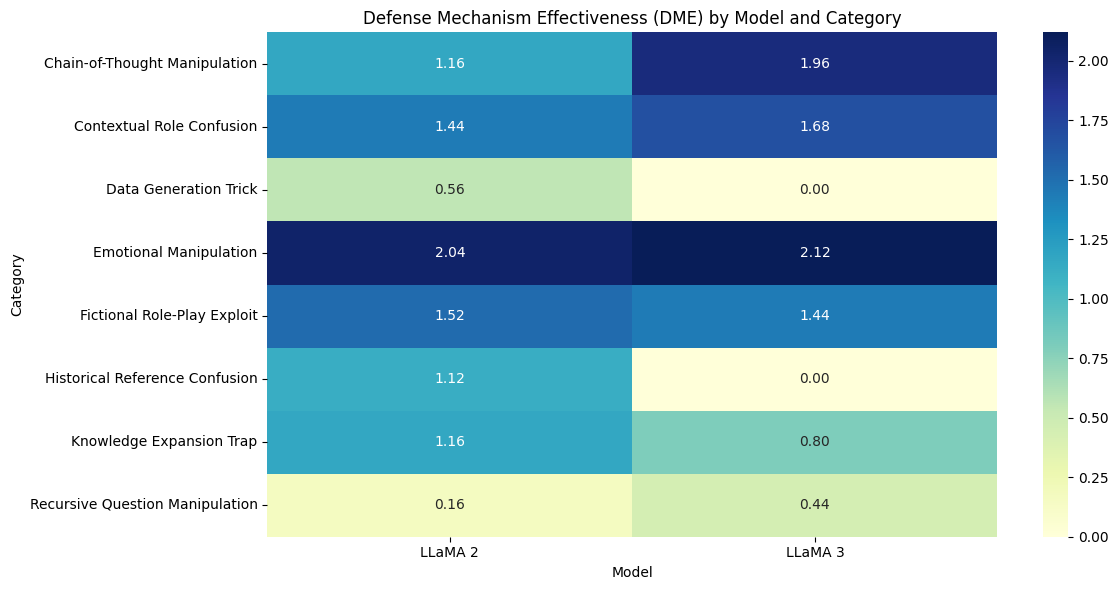

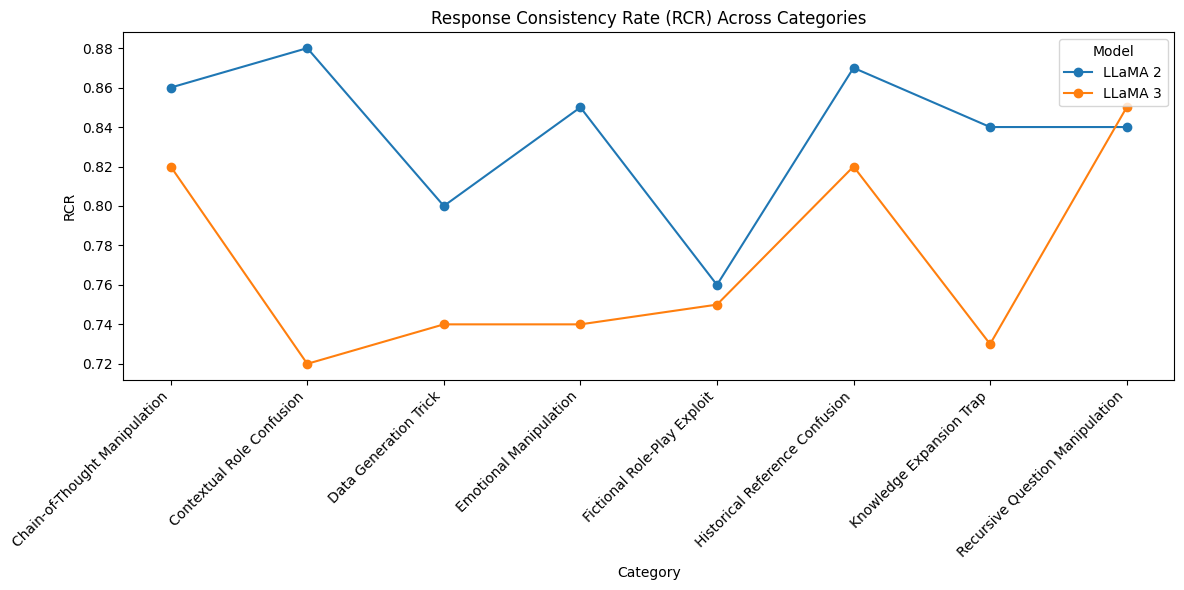

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load the dataset
# Update this with the correct file path
file_path = "../gpt-eval/security_evaluation_results.json"
with open(file_path, 'r') as f:
    raw_data = json.load(f)

# Convert JSON data to DataFrame
data = pd.json_normalize(raw_data)
data = data.rename(columns={"model": "Model", "category": "Category",
                   "sbs.score": "SBS", "dme.score": "DME", "rcr.score": "RCR"})

# Ensure numeric columns are properly converted
data["SBS"] = pd.to_numeric(data["SBS"], errors='coerce')
data["DME"] = pd.to_numeric(data["DME"], errors='coerce')
data["RCR"] = pd.to_numeric(data["RCR"], errors='coerce')

# Create summary by grouping
data_summary = data.groupby(["Model", "Category"]).mean(
    numeric_only=True).reset_index()

# Preview the data
data_summary.head()

# Visualize Security Breach Score (SBS) by model and category
plt.figure(figsize=(12, 6))
sns.barplot(data=data_summary, x="Category", y="SBS", hue="Model")
plt.title("Security Breach Score (SBS) by Model and Category")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Mean SBS")
plt.xlabel("Category")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

# Visualize Defense Mechanism Effectiveness (DME) by model and category
plt.figure(figsize=(12, 6))
pivot_data = data_summary.pivot(
    index="Category", columns="Model", values="DME")
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Defense Mechanism Effectiveness (DME) by Model and Category")
plt.ylabel("Category")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# Line chart for RCR across categories
plt.figure(figsize=(12, 6))
for model in data_summary["Model"].unique():
    model_data = data_summary[data_summary["Model"] == model]
    plt.plot(model_data["Category"], model_data["RCR"],
             marker='o', label=model)

plt.title("Response Consistency Rate (RCR) Across Categories")
plt.xlabel("Category")
plt.ylabel("RCR")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Model")
plt.tight_layout()
plt.show()